# Feature Weights

### Preamble

In [1]:
SYS_PATH = 'C:/Users/mark/Documents/GitHub/honours/dev/package/'

In [4]:
import importlib
import sys; sys.path.append(SYS_PATH)
import analysis.helper as helper
importlib.reload(helper)
%matplotlib inline

In [15]:
#standard imports
import sys
import numpy as np
import scipy.stats as stats
import pandas as pd
from datetime import date, timedelta
import math
from itertools import chain

#third party imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as tkr
import seaborn as sns
from sklearn import metrics

### Feature weights by slice date

In [5]:
reload = True

In [7]:
chart_id = "figures/evaluation/features_slice"
pickle_path = "{}/{}.pkl".format(helper.SAVE_PATH, chart_id)

In [ ]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(20, "evaluate")
    
    data.to_pickle(pickle_path)

In [9]:
df_evaluate = helper.get_results(20, "evaluate")
hi = df_evaluate[["feature_names", "Weights", "forecast_window_years","feature_date_str"]]
df = helper.get_feature_values(hi, total="feature_names")
df["Weights"] = df["Weights"].astype(float)
df["feature_supergroups"] = df["feature_names"].apply(lambda x: x.split("_")[1])
df["feature_groups"] = df["feature_names"].apply(lambda x: x.split("_")[2])
df["feature_subgroups"] = df["feature_names"].apply(lambda x: "_".join(x.split("_")[2:4]))

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor
Error: Learning Curve
Error: Target Outcome


C:/Users/mark/Documents/GitHub/honours/dev/package\analysis\helper.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["total"] = df[total].apply(len)


In [25]:
yo = df.groupby(["forecast_window_years","feature_groups"]).agg({"Weights":sum})
yoo = yo.groupby(level=0, group_keys=False)
yooo = yoo.apply(lambda x: helper.divide_groups(x, yoo.sum()))
yooo = yooo.groupby(level=0, group_keys=False)
weights = yooo.apply(lambda x: x.sort_values(by="Weights",ascending=False))["Weights"]

In [29]:
if type(weights) is pd.Series: weights = weights.to_frame()
weights = weights.reset_index(drop=False)

In [30]:
weights

,forecast_window_years,feature_groups,Weights
0,2.0,advisors,0.426
1,2.0,executives,0.226
2,2.0,investors,0.120
3,2.0,founders,0.110
4,2.0,broader,0.052
5,2.0,funding,0.049
6,2.0,industry,0.012
7,2.0,local,0.004
8,2.0,customers,0.000
9,2.0,influence,0.000


In [32]:
x = "feature_groups"
y = "Weights"
hue = "forecast_window_years"
#hue_order = data.groupby(hue)[y].value_counts().index.sort_values(ascending=True).tolist()

In [42]:
weights.groupby([x, hue]).agg(lambda x: np.std(x))

Weights
feature_groups forecast_window_years         
advisors       2.0                        0.0
               3.0                        0.0
               4.0                        0.0
broader        2.0                        0.0
               3.0                        0.0
               4.0                        0.0
customers      2.0                        0.0
               3.0                        0.0
               4.0                        0.0
executives     2.0                        0.0
               3.0                        0.0
               4.0                        0.0
founders       2.0                        0.0
               3.0                        0.0
               4.0                        0.0
funding        2.0                        0.0
               3.0                        0.0
               4.0                        0.0
industry       2.0                        0.0
               3.0                        0.0
               4.0                        0.0
influence      2.0                        0.0
               3.0                        0.0
               4.0                        0.0
investors      2.0                        0.0
               3.0                        0.0
               4.0                        0.0
local          2.0                        0.0
               3.0                        0.0
               4.0                        0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:976: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis) / a.mean(axis)


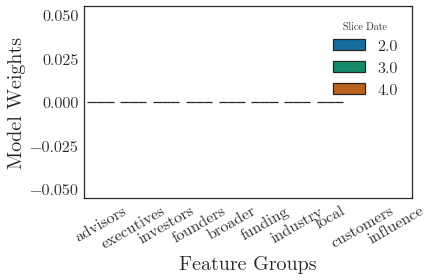

In [35]:
f = plt.figure()
ax = sns.barplot(data=weights, x=x,y=y,hue=hue, estimator = lambda x: stats.variation(x) * 100, orient="v", **helper.outline_bars)
ax.set_xlabel("Feature Groups")
ax.set_ylabel("Model Weights")
plt.xticks(rotation=30)
plt.legend(title="Slice Date")
plt.tight_layout()

In [ ]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Feature weights by forecast window

### Feature weights by developmental stage

### Feature weights by target outcome